In [14]:
import kagglehub
import os
import os
import pandas as pd
import requests
from tqdm import tqdm

# Download latest version
path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\letha\.cache\kagglehub\datasets\neha1703\movie-genre-from-its-poster\versions\5


In [15]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import kagglehub

# -----------------------------
# Download & set paths
# -----------------------------
base_path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

csv_path = os.path.join(base_path, "MovieGenre.csv")
img_dir = os.path.join(base_path, "SampleMoviePosters", "SampleMoviePosters")

print("CSV:", csv_path)
print("Images:", img_dir)

# -----------------------------
# Load CSV
# -----------------------------
df = pd.read_csv(csv_path, encoding="latin1")  # dataset has Latin-1 chars
print("Dataframe shape:", df.shape)
print(df.head())

# -----------------------------
# Visualize a few posters
# -----------------------------
def show_poster(idx):
    row = df.iloc[idx]
    img_name = row["Poster"]   # e.g., "tt0000574.jpg"
    img_path = os.path.join(img_dir, img_name)

    img = Image.open(img_path)

    plt.figure(figsize=(4,6))
    plt.imshow(img)
    plt.title(f"{row['Title']}\nGenres: {row['Genre']}")
    plt.axis("off")
    plt.show()

 

CSV: C:\Users\letha\.cache\kagglehub\datasets\neha1703\movie-genre-from-its-poster\versions\5\MovieGenre.csv
Images: C:\Users\letha\.cache\kagglehub\datasets\neha1703\movie-genre-from-its-poster\versions\5\SampleMoviePosters\SampleMoviePosters
Dataframe shape: (40108, 6)
   imdbId                           Imdb Link  \
0  114709  http://www.imdb.com/title/tt114709   
1  113497  http://www.imdb.com/title/tt113497   
2  113228  http://www.imdb.com/title/tt113228   
3  114885  http://www.imdb.com/title/tt114885   
4  113041  http://www.imdb.com/title/tt113041   

                                Title  IMDB Score                       Genre  \
0                    Toy Story (1995)         8.3  Animation|Adventure|Comedy   
1                      Jumanji (1995)         6.9     Action|Adventure|Family   
2             Grumpier Old Men (1995)         6.6              Comedy|Romance   
3            Waiting to Exhale (1995)         5.7        Comedy|Drama|Romance   
4  Father of the Bride Part 

In [16]:
import os
import pandas as pd
import requests
from tqdm import tqdm

# Path from kagglehub
import kagglehub
base_path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

csv_path = os.path.join(base_path, "MovieGenre.csv")
df = pd.read_csv(csv_path, encoding="latin1")

# Folder to save images
img_dir = os.path.join(base_path, "PostersLocal")
os.makedirs(img_dir, exist_ok=True)

def safe_filename(row):
    # Use imdbId as filename, safer than parsing URL
    return f"{row['imdbId']}.jpg"

 


In [17]:
base_path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

csv_path = os.path.join(base_path, "MovieGenre.csv")
df = pd.read_csv(csv_path, encoding="latin1")

# Folder to save images
img_dir = os.path.join(base_path, "PostersLocal")

In [18]:
import os
import pandas as pd
import requests
from tqdm import tqdm
import kagglehub

# Download dataset
base_path = kagglehub.dataset_download("neha1703/movie-genre-from-its-poster")

csv_path = os.path.join(base_path, "MovieGenre.csv")
df = pd.read_csv(csv_path, encoding="latin1")

# Create folder for local images
img_dir = os.path.join(base_path, "PostersLocal")
os.makedirs(img_dir, exist_ok=True)

# Function to give each poster a local filename
def poster_path(imdbId):
    return os.path.join(img_dir, f"{imdbId}.jpg")

In [19]:
# Download all posters
# for idx, row in tqdm(df.iterrows(), total=len(df)):
#     url = row["Poster"]
#     imdbId = row["imdbId"]
#     out_path = poster_path(imdbId)

#     if os.path.exists(out_path):
#         continue   # skip if already downloaded

#     try:
#         r = requests.get(url, timeout=10)
#         if r.status_code == 200:
#             with open(out_path, "wb") as f:
#                 f.write(r.content)
#         else:
#             print(f"Failed {imdbId}: HTTP {r.status_code}")
#     except:
#         print(f"Error downloading: {url}")

# print("Download completed")

In [32]:
df["local_path"] = df["imdbId"].apply(lambda x: poster_path(x))
df = df[df["local_path"].apply(os.path.exists)].reset_index(drop=True)

In [21]:
df.head()


,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,local_path
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,C:\Users\letha\.cache\kagglehub\datasets\neha1...


In [25]:
random.randint(0, 1000)

968

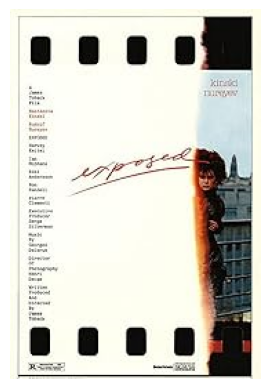

In [65]:
from PIL import Image
import matplotlib.pyplot as plt
import random 

img = Image.open(df.loc[ random.randint(0, df.shape[0]), "local_path"])
plt.imshow(img)
plt.axis("off")
plt.show()
